## Thompson Sampling

In this excercise, we will be playing with the Multi-arm bandit problem with the UCB algorithm.

Assume we are under the Bernoulli reward setting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import beta

mu = np.array([0.30, 0.25, 0.20, 0.15, 0.10])
#mu = np.array([0.30, 0.25, 0.20, 0.15, 0.10, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
#mu = np.array([0.30, 0.55])

class Bernoulli_Bandit():
  def __init__(self, num_arms, mu=None):
    self.num_arms = num_arms
    if mu is None:
      self.mu = np.random.uniform(0,1, num_arms)
    else:
      self.mu = np.array(mu)
    self.total_pull = 0 
  
  def pull_arm(self, arm):
    reward = 1 if np.random.random()< self.mu[arm] else 0
    self.total_pull += 1 
    return reward

  def genie_reward(self, pull_times=1):
    return self.mu.max() * pull_times


In [ ]:
# Thompson Sampling Algorithm
def Thompson(arms, k, n):
  # Keep track of rewards & number of pulls of each arm
  reward_track = np.zeros(k)
  pulls_track = np.zeros(k)
  expectedRegret = []
  regretPerIter = []
  totalPulls = 0
  rewards = 0

  # Initialize alpha, beta
  a = np.ones(k)
  b = np.ones(k)

  # Main loop of Thompson Sampling
  for i in range(n):
    # draw samples from Q
    betas = zip(a, b)
    draws = [beta.rvs(i[0],i[1], size = 1) for i in betas]
    
    # draw from best arm
    bestArm = draws.index(max(draws))
    
    # Pull best arm
    reward = arms.pull_arm(bestArm)
    rewards += reward
    reward_track[bestArm] += reward
    pulls_track[bestArm] += 1
    a[bestArm] += reward
    b[bestArm] += 1 - reward

    # Regret calculation
    totalPulls += 1
    expRegret = abs(arms.genie_reward(totalPulls) - rewards )
    expectedRegret.append( expRegret )
    thisRegret = abs(( arms.genie_reward() ) - reward)
    regretPerIter.append(thisRegret)

  return expectedRegret, regretPerIter


In [ ]:
#Basic UCB algorithm implementation
def U(mu, delta, numPulls):
  if numPulls == 0:
    return float('inf')
  else:
    return mu + np.sqrt( (2 * np.log(1/delta) ) / (numPulls) )

def UCB(arms, k, n):
  # Keep track of rewards & number of pulls of each arm
  reward_track = np.zeros(k)
  pulls_track = np.zeros(k)
  expectedRegret = []
  regretPerIter = []
  totalPulls = 0
  rewards = 0

  # Initialize delta
  delta = 1/(n**2)

  # Play each arm once
  for arm in range(k):
    reward = arms.pull_arm(arm)
    rewards += reward
    reward_track[arm] += reward
    pulls_track[arm] += 1

    # Regret calculation
    totalPulls += 1
    expRegret = abs(arms.genie_reward(totalPulls) - rewards )
    expectedRegret.append( expRegret )
    thisRegret = abs(( arms.genie_reward()) - reward)
    regretPerIter.append(thisRegret)

  # Generate estimates
  estimates = np.zeros(k)
  for arm in range(k):
    estimates[arm] = reward_track[arm] / pulls_track[arm]

  # Main loop of UCB
  while totalPulls < n:
    # Pick the best arm according to U function
    bestVal = -99999999
    bestArm = 0
    for arm in range(k):
      thisArmU = U(estimates[arm], delta, pulls_track[arm])
      if thisArmU > bestVal:
        bestArm = arm
        bestVal = thisArmU

    # Pull arm
    reward = arms.pull_arm(bestArm)
    rewards += reward
    reward_track[bestArm] += reward
    pulls_track[bestArm] += 1
    estimates[bestArm] = reward_track[bestArm] / pulls_track[bestArm]

    # Regret calculation
    totalPulls += 1
    expRegret = abs(arms.genie_reward(totalPulls) - rewards )
    expectedRegret.append( expRegret )
    thisRegret = abs(( arms.genie_reward() ) - reward)
    regretPerIter.append(thisRegret)

  return expectedRegret, regretPerIter


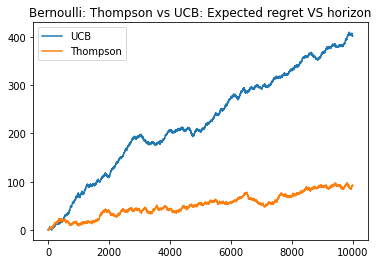

In [ ]:
#Plot the regret VS horizon(n)
k = 5
n = 10000
arms = Bernoulli_Bandit(k,mu)

expRegretUCB, regretPerIterUCB = UCB(arms, k, n)
expRegretThompson, regretPerIterThompson = Thompson(arms, k, n)

x_coor = [i for i in range(len(expRegretUCB))]
plt.plot(x_coor, expRegretUCB, label = "UCB")
plt.plot(x_coor, expRegretThompson, label = "Thompson")
plt.title('Bernoulli: Thompson vs UCB: Expected regret VS horizon')
plt.legend()
plt.show()



## Goal of this exercise
1. Basic Thompson Sampling algorithm implementation
2. Plot the regret VS horizon ($n$).
3. Compare to the UCB algorithm.

Please refer to previous assignment for tips.
